In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv("Laptop.csv",encoding = 'unicode_escape')
df.shape

(130, 11)

In [11]:
df.head()

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
0,0,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040
1,1,DELL,Vostro,NaN,i5,11th,8.0,1 TB HDD,Windows 10 Home,3.6,50840
2,2,ASUS,VivoBook,15,i3,10th,8.0,512 GB SSD,Windows 11 Home,4.3,37940
3,3,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,256 GB SSD,4.4,44440
4,4,ASUS,TUF,Gaming,i5,10th,8.0,512 GB SSD,Windows 10 Home,4.5,57940


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          130 non-null    int64  
 1   Brand               130 non-null    object 
 2   Model               116 non-null    object 
 3   Series              80 non-null     object 
 4   Processor           123 non-null    object 
 5   Processor_Gen       123 non-null    object 
 6   RAM                 122 non-null    float64
 7   Hard_Disk_Capacity  122 non-null    object 
 8   OS                  122 non-null    object 
 9   Rating              130 non-null    float64
 10  Price               130 non-null    int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 11.3+ KB


In [13]:
pd.isnull(df).sum()

Unnamed: 0             0
Brand                  0
Model                 14
Series                50
Processor              7
Processor_Gen          7
RAM                    8
Hard_Disk_Capacity     8
OS                     8
Rating                 0
Price                  0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.columns

Index(['Unnamed: 0', 'Brand', 'Model', 'Series', 'Processor', 'Processor_Gen',
       'RAM', 'Hard_Disk_Capacity', 'OS', 'Rating', 'Price'],
      dtype='object')

In [17]:
df.nunique()

Unnamed: 0            72
Brand                  8
Model                 25
Series                26
Processor             16
Processor_Gen          9
RAM                    3
Hard_Disk_Capacity     7
OS                     7
Rating                12
Price                 49
dtype: int64

In [18]:
brand_count=df["Brand"].value_counts()[:10]
brand_count[:8]

ASUS         27
Lenovo       24
HP            9
DELL          5
acer          3
MSI           2
realme        1
MICROSOFT     1
Name: Brand, dtype: int64

[Text(0.5, 0, 'Brand'),
 Text(0, 0.5, 'Laptop Number'),
 Text(0.5, 1.0, 'Brand - Laptop Number')]

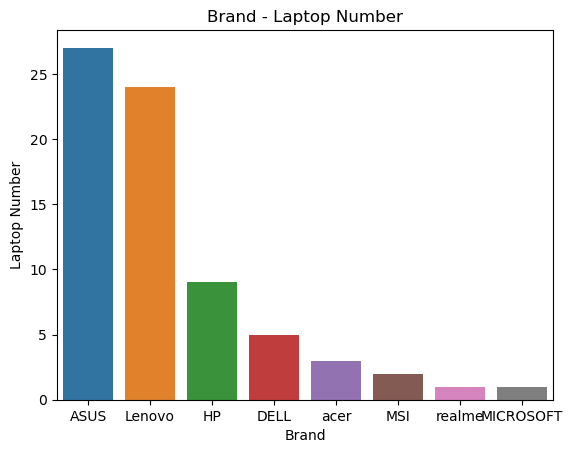

In [19]:
fig=sns.barplot(x=brand_count.index,y=brand_count)
fig.set(xlabel ="Brand", ylabel = "Laptop Number", title ="Brand - Laptop Number")

In [20]:
brand_series=pd.crosstab(df["Brand"],df["Series"])
brand_series

Series,(Slim),14,15,3,3405,5,530s,7,Athlon,Celeron,...,Laptop,PC,Pavilion,Ryzen,Slim,Strix,TUF,Thin,Ultra,Zephyrus
Brand,,,,,,,,,,,,,,,,,,,,,
ASUS,0,4,8,1,0,1,0,0,0,2,...,0,0,0,0,0,1,1,0,1,1
DELL,0,0,0,0,1,0,0,0,1,0,...,0,0,0,3,0,0,0,0,0,0
HP,0,0,0,2,0,1,0,0,0,0,...,0,1,2,1,0,0,0,0,0,0
Lenovo,0,0,0,13,0,1,1,0,0,0,...,0,0,0,1,4,0,0,0,0,0
MICROSOFT,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
MSI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
acer,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
realme,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


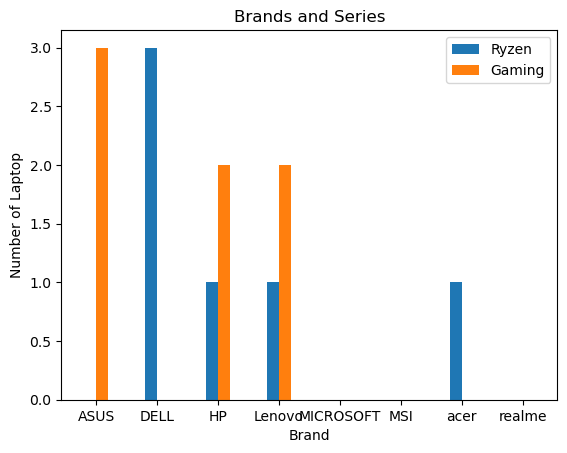

In [21]:
x=brand_series
X_axis = np.arange(len(x))

y1=brand_series["Ryzen"]
y2=brand_series["Gaming"]
 
plt.bar(X_axis-0.1,y1,0.2,label="Ryzen")
plt.bar(X_axis+0.1,y2,0.2,label="Gaming")

plt.xticks(X_axis, brand_series.index) 

plt.title("Brands and Series")
plt.xlabel("Brand")
plt.ylabel("Number of Laptop")

plt.legend()

In [22]:
m=df["Model"].value_counts()[:10]
m[:5]

IdeaPad     15
VivoBook    11
Vivobook     6
Ideapad      6
Ryzen        5
Name: Model, dtype: int64

[Text(0.5, 0, 'Model'),
 Text(0, 0.5, 'Laptop Number'),
 Text(0.5, 1.0, 'Model- Laptop Number')]

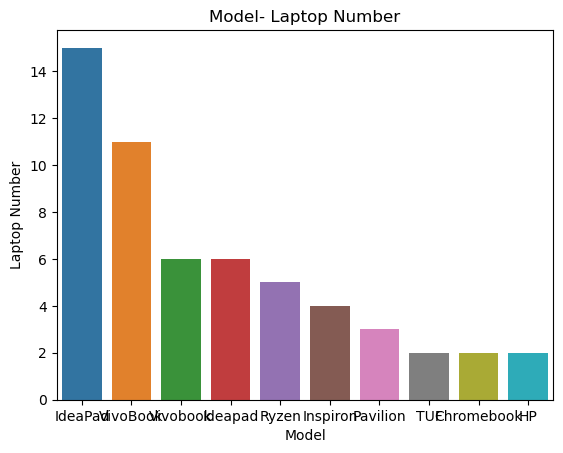

In [23]:
fig=sns.barplot(x=m.index,y=m)
fig.set(xlabel ="Model", ylabel = "Laptop Number", title ="Model- Laptop Number")

In [24]:
r=df[df["Rating"]>3]
r1=r.groupby(["Brand"])["Price"].mean().sort_values(ascending=True)
r1[:8]

Brand
DELL         42980.000000
realme       46940.000000
Lenovo       49537.250000
ASUS         51022.692308
HP           59717.777778
acer         61940.000000
MSI          71440.000000
MICROSOFT    91949.000000
Name: Price, dtype: float64

Text(0, 0.5, 'Brand')

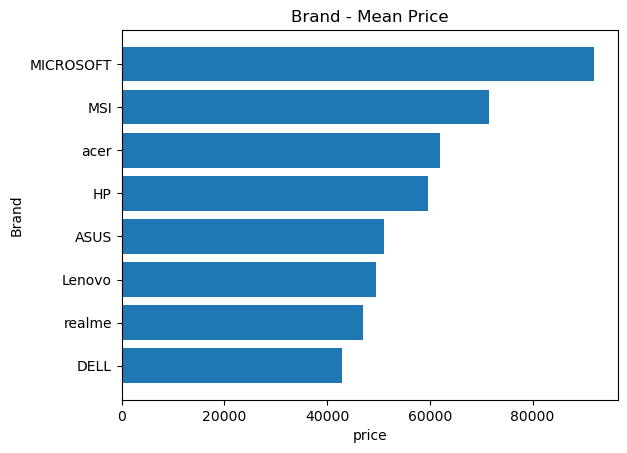

In [25]:
plt.barh(r1.index,r1)
plt.title("Brand - Mean Price")
plt.xlabel("price")
plt.ylabel("Brand")

[Text(0.5, 0, 'OS'),
 Text(0, 0.5, 'Laptop Number'),
 Text(0.5, 1.0, 'OS - Laptop Number')]

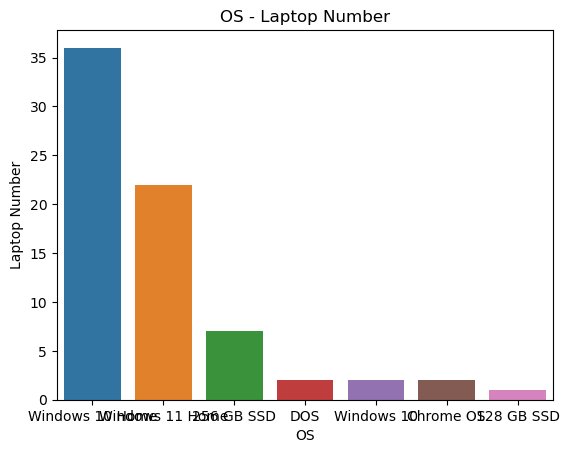

In [26]:
fig=sns.barplot(x=df["OS"].value_counts().index,y=df["OS"].value_counts())
fig.set(xlabel ="OS", ylabel = "Laptop Number",title="OS - Laptop Number")

Text(0.5, 0, 'Ram Mean')

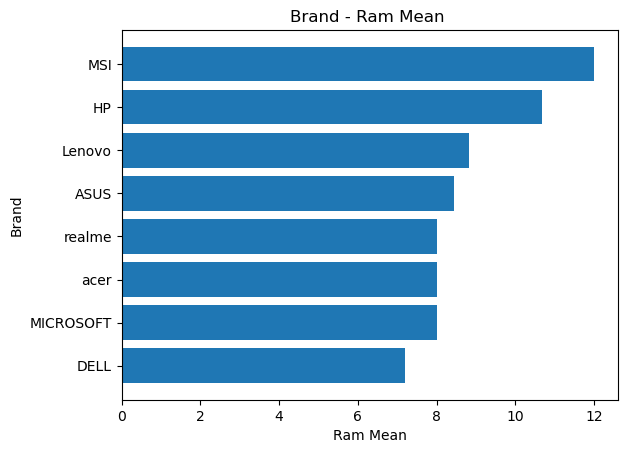

In [27]:
brand_ram_mean=df.groupby(["Brand"])["RAM"].mean().sort_values(ascending=True)
plt.barh(brand_ram_mean.index,brand_ram_mean)
plt.title("Brand - Ram Mean ")
plt.ylabel("Brand")
plt.xlabel("Ram Mean")

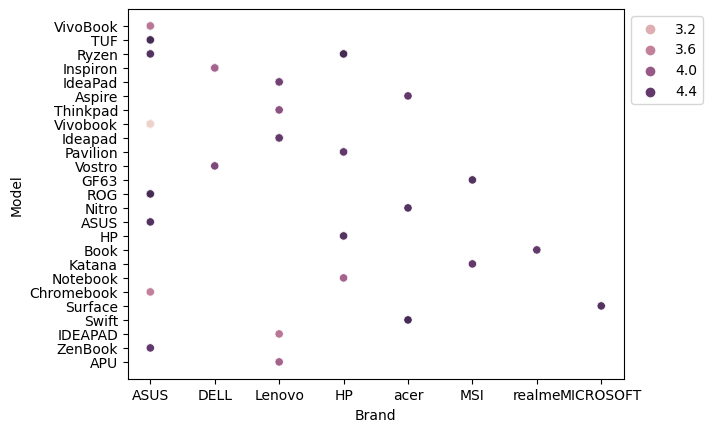

In [28]:
sns.scatterplot(x ='Brand',y ='Model',data=df,hue='Rating')
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

In [29]:
hd=pd.crosstab(df["Brand"],df["Hard_Disk_Capacity"])
hd

Hard_Disk_Capacity,1 TB HDD,1 TB SSD,128 GB SSD,256 GB SSD,32 GB EMMC Storage,512 GB SSD,64 GB EMMC Storage
Brand,,,,,,,
ASUS,6,1,0,7,1,11,1
DELL,1,0,0,3,0,1,0
HP,2,0,0,1,0,6,0
Lenovo,3,0,0,8,0,13,0
MICROSOFT,0,0,1,0,0,0,0
MSI,0,0,0,0,0,2,0
acer,2,0,0,0,0,1,0
realme,0,0,0,1,0,0,0


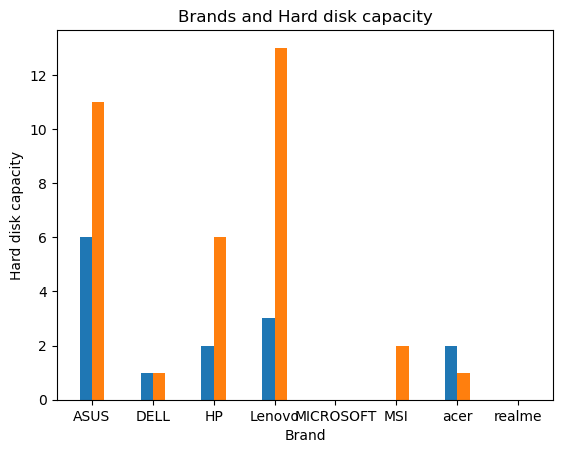

In [30]:
x=hd
X_axis = np.arange(len(x))

y1=hd["1 TB HDD"]
y2=hd["512 GB SSD"]
 
plt.bar(X_axis-0.1,y1,0.2,label="1TB HDD")
plt.bar(X_axis+0.1,y2,0.2,label="512 GB SSD")

plt.xticks(X_axis, hd.index) 

plt.title("Brands and Hard disk capacity")
plt.xlabel("Brand")
plt.ylabel("Hard disk capacity")

plt.show()

In [31]:
m=pd.crosstab(df["Brand"],df["OS"])
m

OS,128 GB SSD,256 GB SSD,Chrome OS,DOS,Windows 10,Windows 10 Home,Windows 11 Home
Brand,,,,,,,
ASUS,0,3,2,0,0,16,6
DELL,0,1,0,0,0,1,3
HP,0,1,0,0,1,4,3
Lenovo,0,1,0,2,1,10,10
MICROSOFT,0,0,0,0,0,1,0
MSI,0,0,0,0,0,2,0
acer,1,1,0,0,0,1,0
realme,0,0,0,0,0,1,0


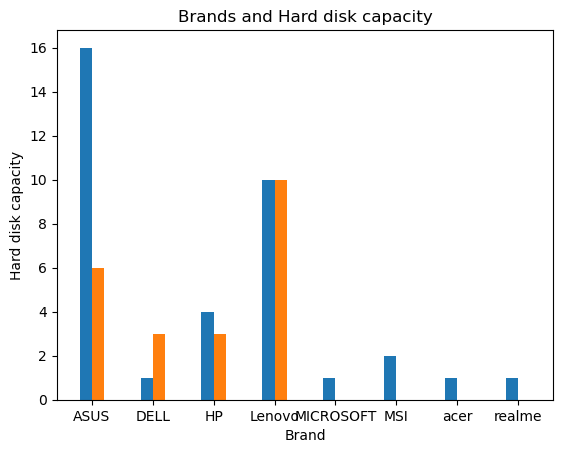

In [32]:
x=m
X_axis = np.arange(len(x))

y1=m["Windows 10 Home"]
y2=m["Windows 11 Home"]
 
plt.bar(X_axis-0.1,y1,0.2,label="Windows 10 Home")
plt.bar(X_axis+0.1,y2,0.2,label="Windows 11 Home")

plt.xticks(X_axis, m.index) 

plt.title("Brands and Hard disk capacity")
plt.xlabel("Brand")
plt.ylabel("Hard disk capacity")

plt.show()